
# Project 1 – Red Wine Classification
<br><br>



**Task:** Implement a Red wine quality classifier using a Neural network

In [45]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
#Import dataset
data_wine = pd.read_csv('winequality-red.csv', sep=",")
data_wine.columns = df.columns.str.replace(' ', '_')
data_wine.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


# EDA
Explore the features using histograms, any data preprocessing required.

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

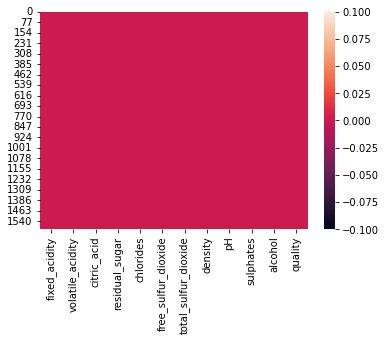

In [47]:
# Checking for missing values

sns.heatmap(df.isna())
pd.isnull(df).sum()

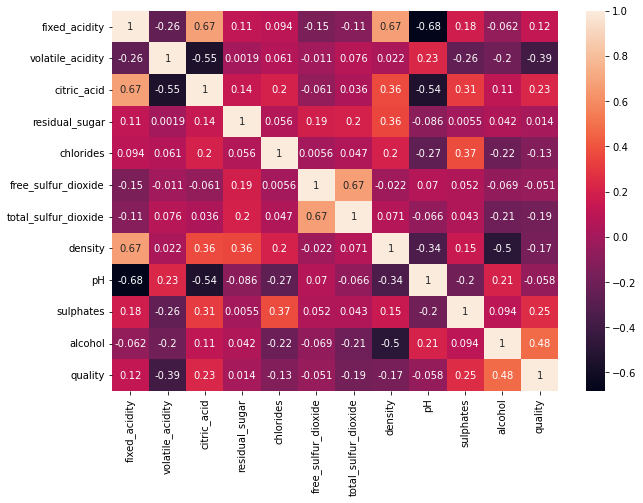

In [48]:
# Correlation Matrix
fig , ax = plt.subplots(figsize = (10,7))
sns.heatmap(df.corr() , annot = True , ax = ax)
plt.show()

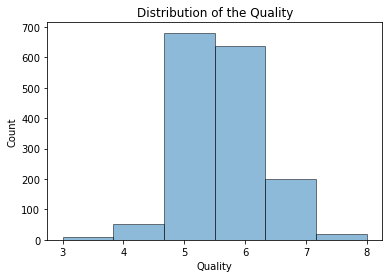

In [49]:
# Histogram

plt.hist(df.quality,bins=6,alpha=0.5,histtype='bar',ec='black')
plt.title('Distribution of the Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [50]:
#sns.pairplot(data_wine)

<AxesSubplot:xlabel='fixed_acidity', ylabel='density'>

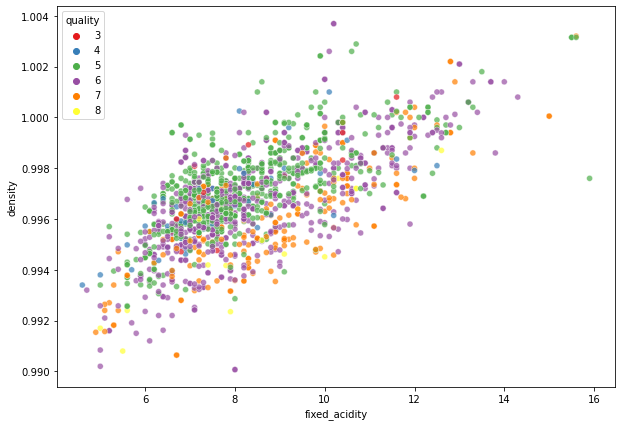

In [51]:
plt.figure(figsize = (10, 7))
sns.scatterplot(
    x = "fixed_acidity", 
    y = "density", 
    hue = "quality",
    data = df, 
    alpha = 0.7, 
    palette = "Set1"
)

## Data Preprocessing

In [53]:
features = data_wine.drop(['quality'] , axis = 1)
target = data_wine['quality']

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
model = RandomForestRegressor(random_state=1, max_depth=12)

data = pd.get_dummies(data_wine)
model.fit(features, data.quality)
display(model.feature_importances_)
feat = data.columns

imp = model.feature_importances_
indices = np.argsort(imp)[:]

array([0.05049791, 0.13604892, 0.04475298, 0.05247952, 0.05881777,
       0.0458654 , 0.07643178, 0.0515247 , 0.05821171, 0.14268737,
       0.28268191])

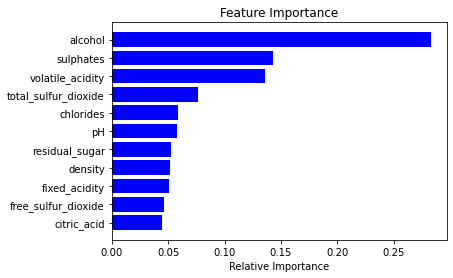

In [56]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feat[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [57]:
# Let's remove the last 3 features

del features['fixed_acidity']
del features['free_sulfur_dioxide']
del features['citric_acid']
features.tail()

,volatile_acidity,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol
1594,0.600,2.0,0.090,44.0,0.99490,3.45,0.58,10.5
1595,0.550,2.2,0.062,51.0,0.99512,3.52,0.76,11.2
1596,0.510,2.3,0.076,40.0,0.99574,3.42,0.75,11.0
1597,0.645,2.0,0.075,44.0,0.99547,3.57,0.71,10.2
1598,0.310,3.6,0.067,42.0,0.99549,3.39,0.66,11.0


In [58]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [59]:
le = LabelEncoder()
y = le.fit_transform(data.iloc[: , -1])
y = pd.DataFrame(y.reshape(len(y),1))

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# Spliting data into Train and Test

x_train, x_test, y_train, y_test = train_test_split(features,y, test_size = 0.3, random_state = 0)

y_train_cat = tf.keras.utils.to_categorical(y_train, 6)
y_test_cat = tf.keras.utils.to_categorical(y_test, 6)

# DNN

In [62]:
def create_feature_column():
    feat_volatile_acidity       = tf.feature_column.numeric_column('volatile_acidity')
    feat_residual_sugar         = tf.feature_column.numeric_column('residual_sugar')
    feat_chlorides              = tf.feature_column.numeric_column('chlorides')
    feat_total_sulfur_dioxide   = tf.feature_column.numeric_column('total_sulfur_dioxide')
    feat_density                = tf.feature_column.numeric_column('density')
    feat_pH                     = tf.feature_column.numeric_column('pH')
    feat_sulphates              = tf.feature_column.numeric_column('sulphates')
    feat_alcohol                = tf.feature_column.numeric_column('alcohol')

    feature_column = [ feat_volatile_acidity,feat_residual_sugar, feat_chlorides, 
                       feat_total_sulfur_dioxide,feat_density,feat_pH,feat_sulphates,feat_alcohol] 

    return feature_column

feature_column = create_feature_column()

In [63]:
dnn = tf.estimator.DNNClassifier(
    hidden_units = [20,20,20],
    feature_columns = feature_column,
    n_classes= 6,
    activation_fn=tf.nn.relu,
    dropout=None
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\aksha\\AppData\\Local\\Temp\\tmpjnccw58j', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [64]:
def traineval(x_train, y_train, training=False, batch_size=128):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(x_train), y_train))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()

    return dataset.batch(batch_size)

In [65]:
dnn.train(
    input_fn = lambda: traineval(x_train, y_train , training=True), steps=5000
)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\aksha\AppData\Local\Temp\tmpjnccw58j\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 2.0042129, step = 0
INFO:tensorflow:global_step/sec: 502.561
INFO:tensorflow:loss = 1.3587123, step = 100 (0.199 sec)
INFO:tensorflow:global_step/sec: 805.069
INFO:tensorflow:loss = 1.1268066, step = 200 (0.124 sec)
INFO:tensorflow:global_step/sec: 803.625
INFO:tensorflow:loss = 1.1526861, step = 300 (0.126 sec)
INFO:tensorflow:global_step/sec: 817.058
INFO:tensorflow:loss = 1.1842074, step = 400 (0.122 sec)
INFO:tensorflow:global_step/sec: 834.995
INFO:tensorflow:loss = 1.1128396, 

In [66]:
eval_result = dnn.evaluate(input_fn=lambda: traineval(x_test, y_test, training=False))
predictions = dnn.predict(input_fn=lambda: traineval(x_test, y_test, training=False))

print(eval_result)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-02-06T22:07:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\aksha\AppData\Local\Temp\tmpjnccw58j\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.38901s
INFO:tensorflow:Finished evaluation at 2023-02-06-22:07:38
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.5083333, average_loss = 1.1032077, global_step = 5000, loss = 1.0980217
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\aksha\AppData\Local\Temp\tmpjnccw58j\model.ckpt-5000
{'accuracy': 0.5083333, 'average_loss': 1.1032077, 'loss': 1.0980217, 'global_step': 5000}


# Keras

In [67]:
ann = tf.keras.models.Sequential(layers = None, name = None)

In [68]:
ann.add(tf.keras.layers.Input(shape = 8,))
ann.add(tf.keras.layers.Dense(units = 16 , activation = "relu" ))
ann.add(tf.keras.layers.Dense(units = 8 , activation = "relu" ))
ann.add(tf.keras.layers.Dense(units = 6 , activation = "sigmoid"))
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 6)                 54        
                                                                 
Total params: 334
Trainable params: 334
Non-trainable params: 0
_________________________________________________________________


In [69]:
ann.compile(
    optimizer = 'adam', 
    loss = 'categorical_crossentropy',
    metrics= ['accuracy']
)

history = ann.fit(
    x_train, 
    y_train_cat,  
    batch_size= 32, 
    epochs = 100, 
    validation_data = (x_test,y_test_cat)
)

Epoch 1/100
35/35 [==============================] - 1s 11ms/step - loss: 9.0489 - accuracy: 0.0751 - val_loss: 6.1594 - val_accuracy: 0.2021
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 4.8616 - accuracy: 0.2985 - val_loss: 3.9662 - val_accuracy: 0.2792
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 3.0236 - accuracy: 0.2949 - val_loss: 2.1885 - val_accuracy: 0.2812
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 1.7485 - accuracy: 0.3199 - val_loss: 1.4262 - val_accuracy: 0.3604
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 1.3601 - accuracy: 0.4397 - val_loss: 1.2369 - val_accuracy: 0.4812
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 1.2685 - accuracy: 0.4745 - val_loss: 1.1920 - val_accuracy: 0.5083
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 1.2267 - accuracy: 0.4978 - val_loss: 1.1602 - val_accuracy: 0.5021
Epoch 8/100



## A) Plot training loss and validation loss

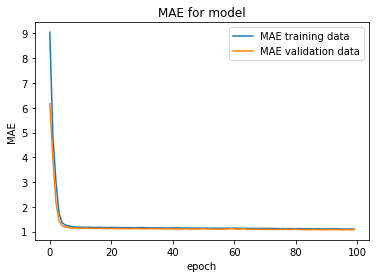

In [70]:
plt.plot(history.history['loss'], label='MAE training data')
plt.plot(history.history['val_loss'], label='MAE validation data')
plt.legend()
plt.title('MAE for model')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

## B) Plot training accuracy and validation accuracy

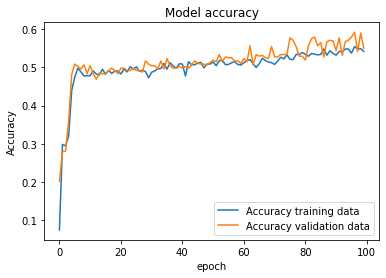

In [71]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

# Conclusion
Provide observations/reasoning where necessary and a conclusion section at the end of the notebook.

**Answer:**<br>
The model is not properly trained so the loss high.
<br>
It has good accuracy 
<br>
To conclude accuracy is almost same between DNN and Keras